# Part 1: Load Dataset
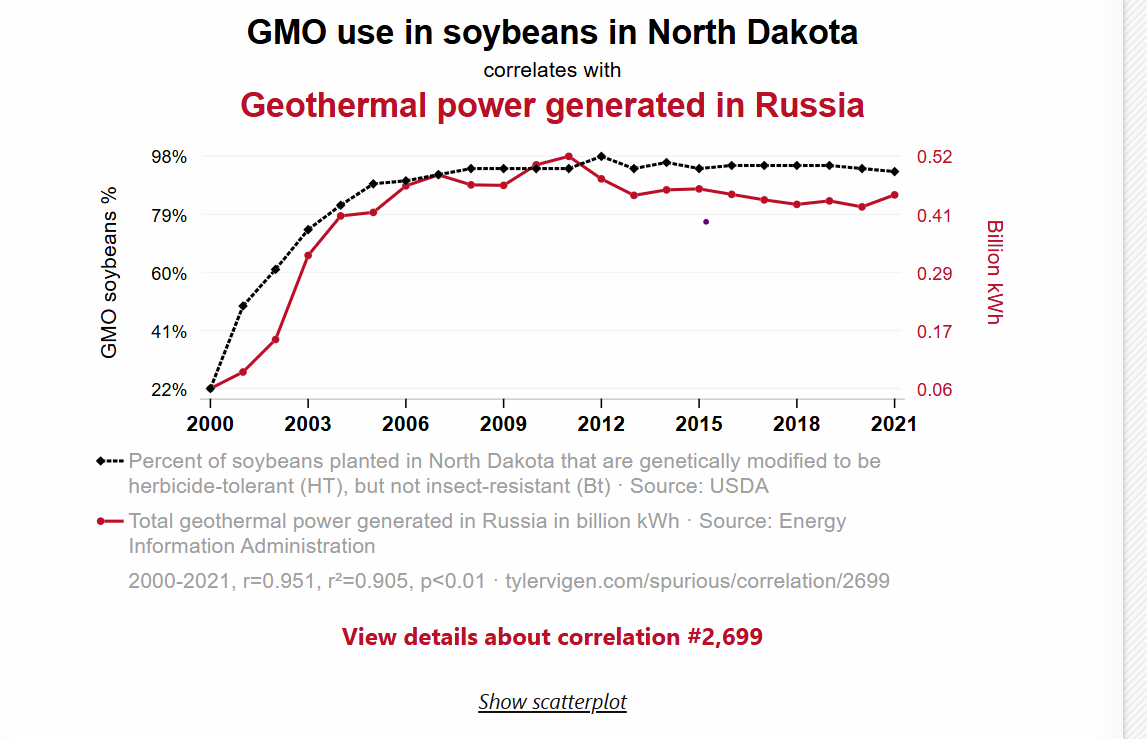

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/housing.csv')
df.head()

Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Part 2: Compute Correlation Between Variables

In [3]:
corr = df[['median_income','median_house_value']].corr().iloc[0,1]
corr

np.float64(0.6880752079585577)

# Part 3: Scatter Plot

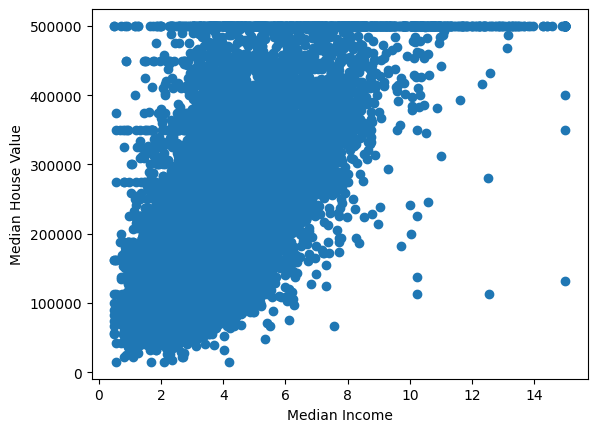

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['median_income'], df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Part 4: 95% Confidence Interval & p-value

In [5]:
import scipy.stats as stats
r = corr
n = df.shape[0]
t_stat = r * ((n-2)/(1-r**2))**0.5
p_value = stats.t.sf(abs(t_stat), df=n-2)*2
t_stat, p_value

(np.float64(136.22250779990253), np.float64(0.0))

# Part 5: Bootstrapping CI for Correlation

In [6]:
import numpy as np
boot = []
for _ in range(1000):
    sample = df.sample(len(df), replace=True)
    boot.append(sample['median_income'].corr(sample['median_house_value']))
ci = np.percentile(boot, [2.5, 97.5])
ci

array([0.67917385, 0.69697549])